In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("processed.csv")

In [21]:
df

,id,inning,over,ball,batsman,bowler,batsman_runs,is_wicket,batting_team,bowling_team,toss_decision,venue,Year,total_runs,venue_encoded,batsman_encoded,bowler_encoded
0,1304047,2,19,6,LH Ferguson,DJ Bravo,1,0,Kolkata Knight Riders,Chennai Super Kings,False,Wankhede Stadium,2022,126,22,230,299
1,1304047,1,0,1,RD Gaikwad,Umesh Yadav,0,0,Chennai Super Kings,Kolkata Knight Riders,False,Wankhede Stadium,2022,125,22,379,291
2,1304047,1,0,2,RD Gaikwad,Umesh Yadav,0,0,Chennai Super Kings,Kolkata Knight Riders,False,Wankhede Stadium,2022,125,22,379,291
3,1304047,1,0,3,RD Gaikwad,Umesh Yadav,0,0,Chennai Super Kings,Kolkata Knight Riders,False,Wankhede Stadium,2022,125,22,379,291
4,1304047,1,0,4,RD Gaikwad,Umesh Yadav,0,1,Chennai Super Kings,Kolkata Knight Riders,False,Wankhede Stadium,2022,125,22,379,291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119518,1237181,1,12,5,RR Pant,NM Coulter-Nile,0,0,Delhi Capitals,Mumbai Indians,True,Dubai International Cricket Stadium,2020,152,10,357,256
119519,1237181,1,12,6,RR Pant,NM Coulter-Nile,1,0,Delhi Capitals,Mumbai Indians,True,Dubai International Cricket Stadium,2020,152,10,357,256
119520,1237181,1,13,1,RR Pant,Krunal Pandya,0,0,Delhi Capitals,Mumbai Indians,True,Dubai International Cricket Stadium,2020,152,10,357,286
119521,1237181,1,13,2,RR Pant,Krunal Pandya,1,0,Delhi Capitals,Mumbai Indians,True,Dubai International Cricket Stadium,2020,152,10,357,286


In [22]:
df["Year"].value_counts()

2022    17726
2023    17681
2020    14434
2019    14217
2018    14200
2016    14024
2017    13690
2015    13551
Name: Year, dtype: int64

In [23]:
uni=df.groupby('venue')["id"].nunique()
uni

venue
Arun Jaitley Stadium                                                      7
Barsapara Cricket Stadium, Guwahati                                       2
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow     7
Brabourne Stadium                                                        19
Dr DY Patil Sports Academy, Mumbai                                       20
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium                      11
Dubai International Cricket Stadium                                      26
Eden Gardens                                                             46
Feroz Shah Kotla                                                         33
Green Park                                                                4
Himachal Pradesh Cricket Association Stadium, Dharamsala                  2
Holkar Cricket Stadium                                                    7
JSCA International Stadium Complex                                        1
M Chin

# STADIUM

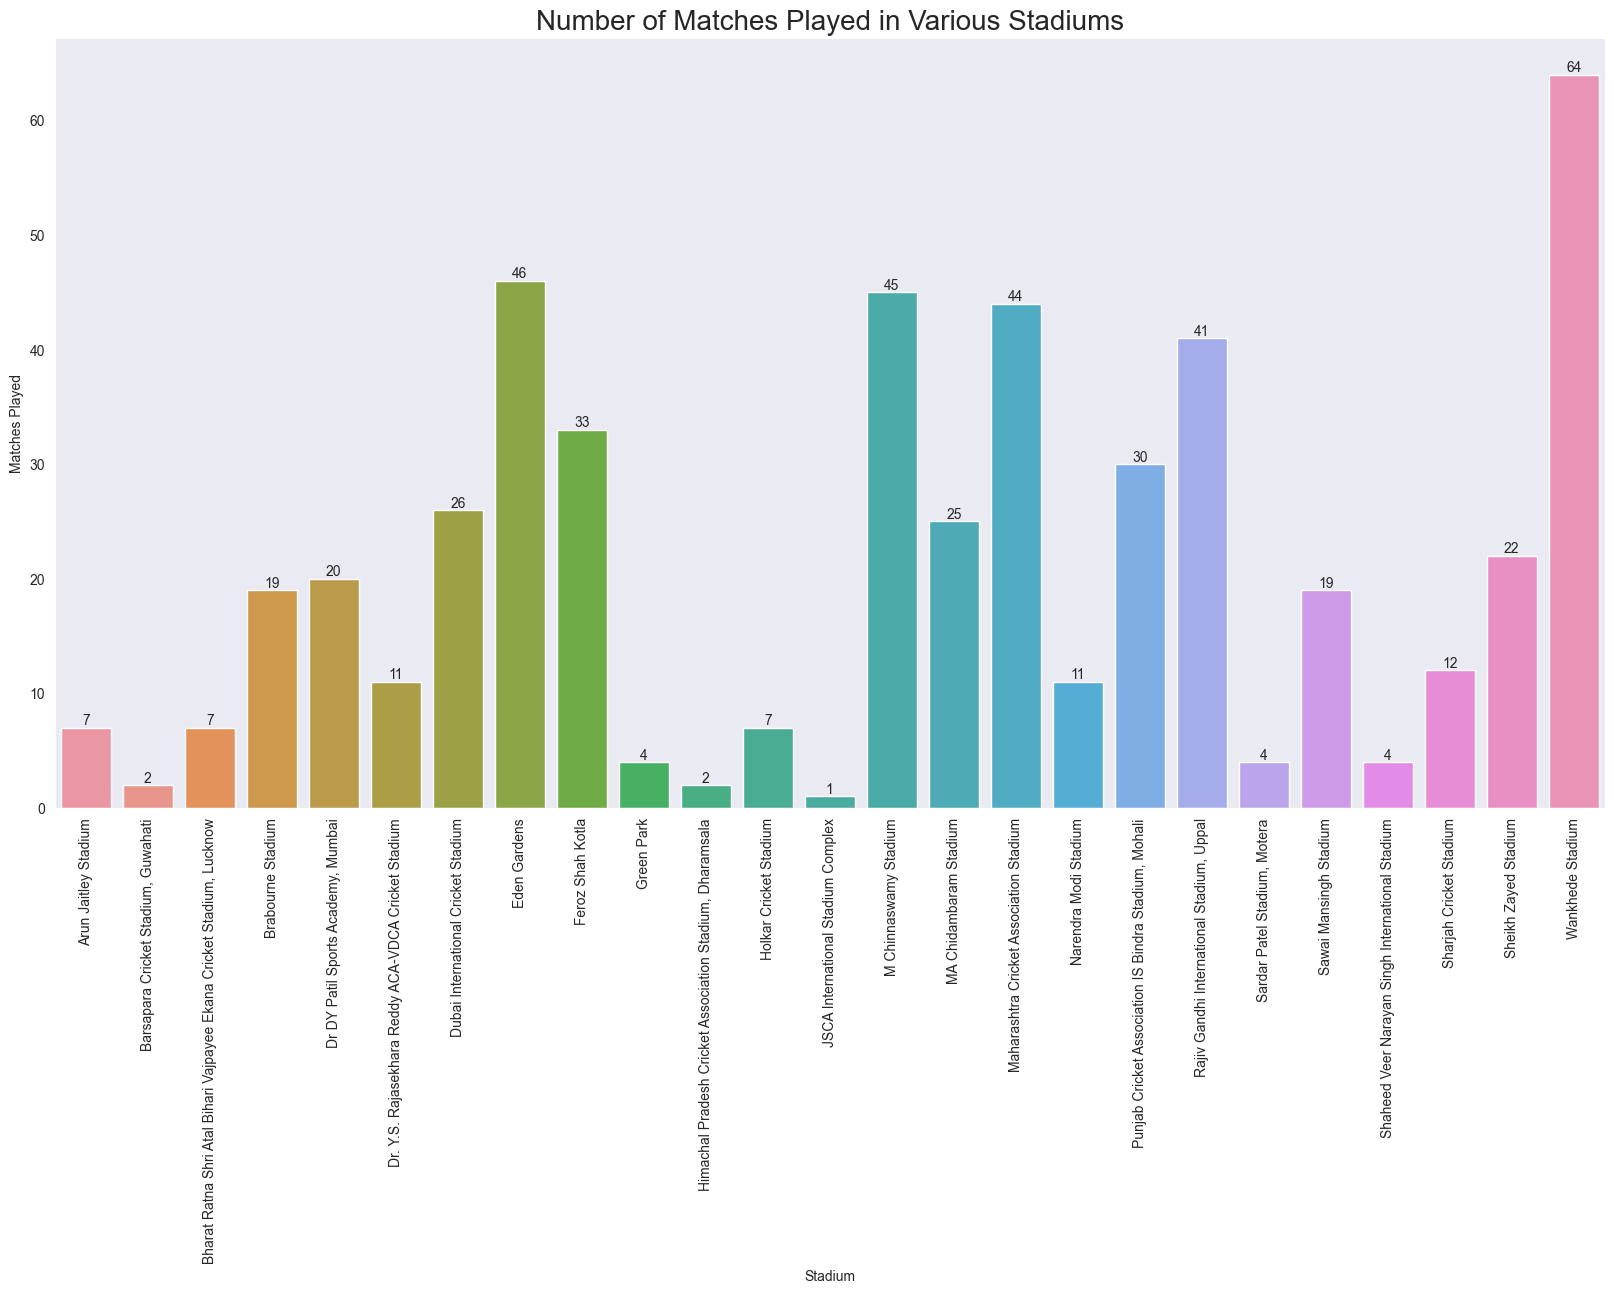

In [24]:
sns.set_style("dark")
plt.figure(figsize=(20,10))
ax=sns.barplot(x=uni.index,y=uni.values)
ax.bar_label(ax.containers[0])
plt.title("Number of Matches Played in Various Stadiums",fontsize = 20)
plt.xlabel("Stadium")
plt.ylabel("Matches Played")
plt.xticks(rotation="vertical")
plt.show()

The above diagram is a barplot showing number of matches played in various stadium.In this graph we had plotted the name of stadium in x-axis and number of matches played in y-axis.As from the graph it is clear that Wankhade stadium had the most number of matches(64) and Eden Gardens(46) , M Chinnaswamy Stadium(45) , Maharashtra Cricket Association Stadium(44) have second,third and fourth place respectievly.Rajiv Gandhi International Stadium,Upal(41) also had matches almost similiar to Eden Gardens.JSCA International Stadium Complex(1) had the least number of matches.Barsapara cricket Stadium,Guwahati(2) and HPCA stadium,Dharmashala(2) also didnot had much matches.

In [25]:
df.groupby("venue")["toss_decision"].unique()

venue
Arun Jaitley Stadium                                                     [False, True]
Barsapara Cricket Stadium, Guwahati                                            [False]
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    [False, True]
Brabourne Stadium                                                        [False, True]
Dr DY Patil Sports Academy, Mumbai                                       [False, True]
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium                      [False, True]
Dubai International Cricket Stadium                                      [False, True]
Eden Gardens                                                             [False, True]
Feroz Shah Kotla                                                         [False, True]
Green Park                                                                     [False]
Himachal Pradesh Cricket Association Stadium, Dharamsala                       [False]
Holkar Cricket Stadium               

In [26]:
std=df.groupby("venue")["toss_decision"].value_counts()
std=std.drop(["Barsapara Cricket Stadium, Guwahati","Green Park","Himachal Pradesh Cricket Association Stadium, Dharamsala","JSCA International Stadium Complex"])

# TOSS DECISION

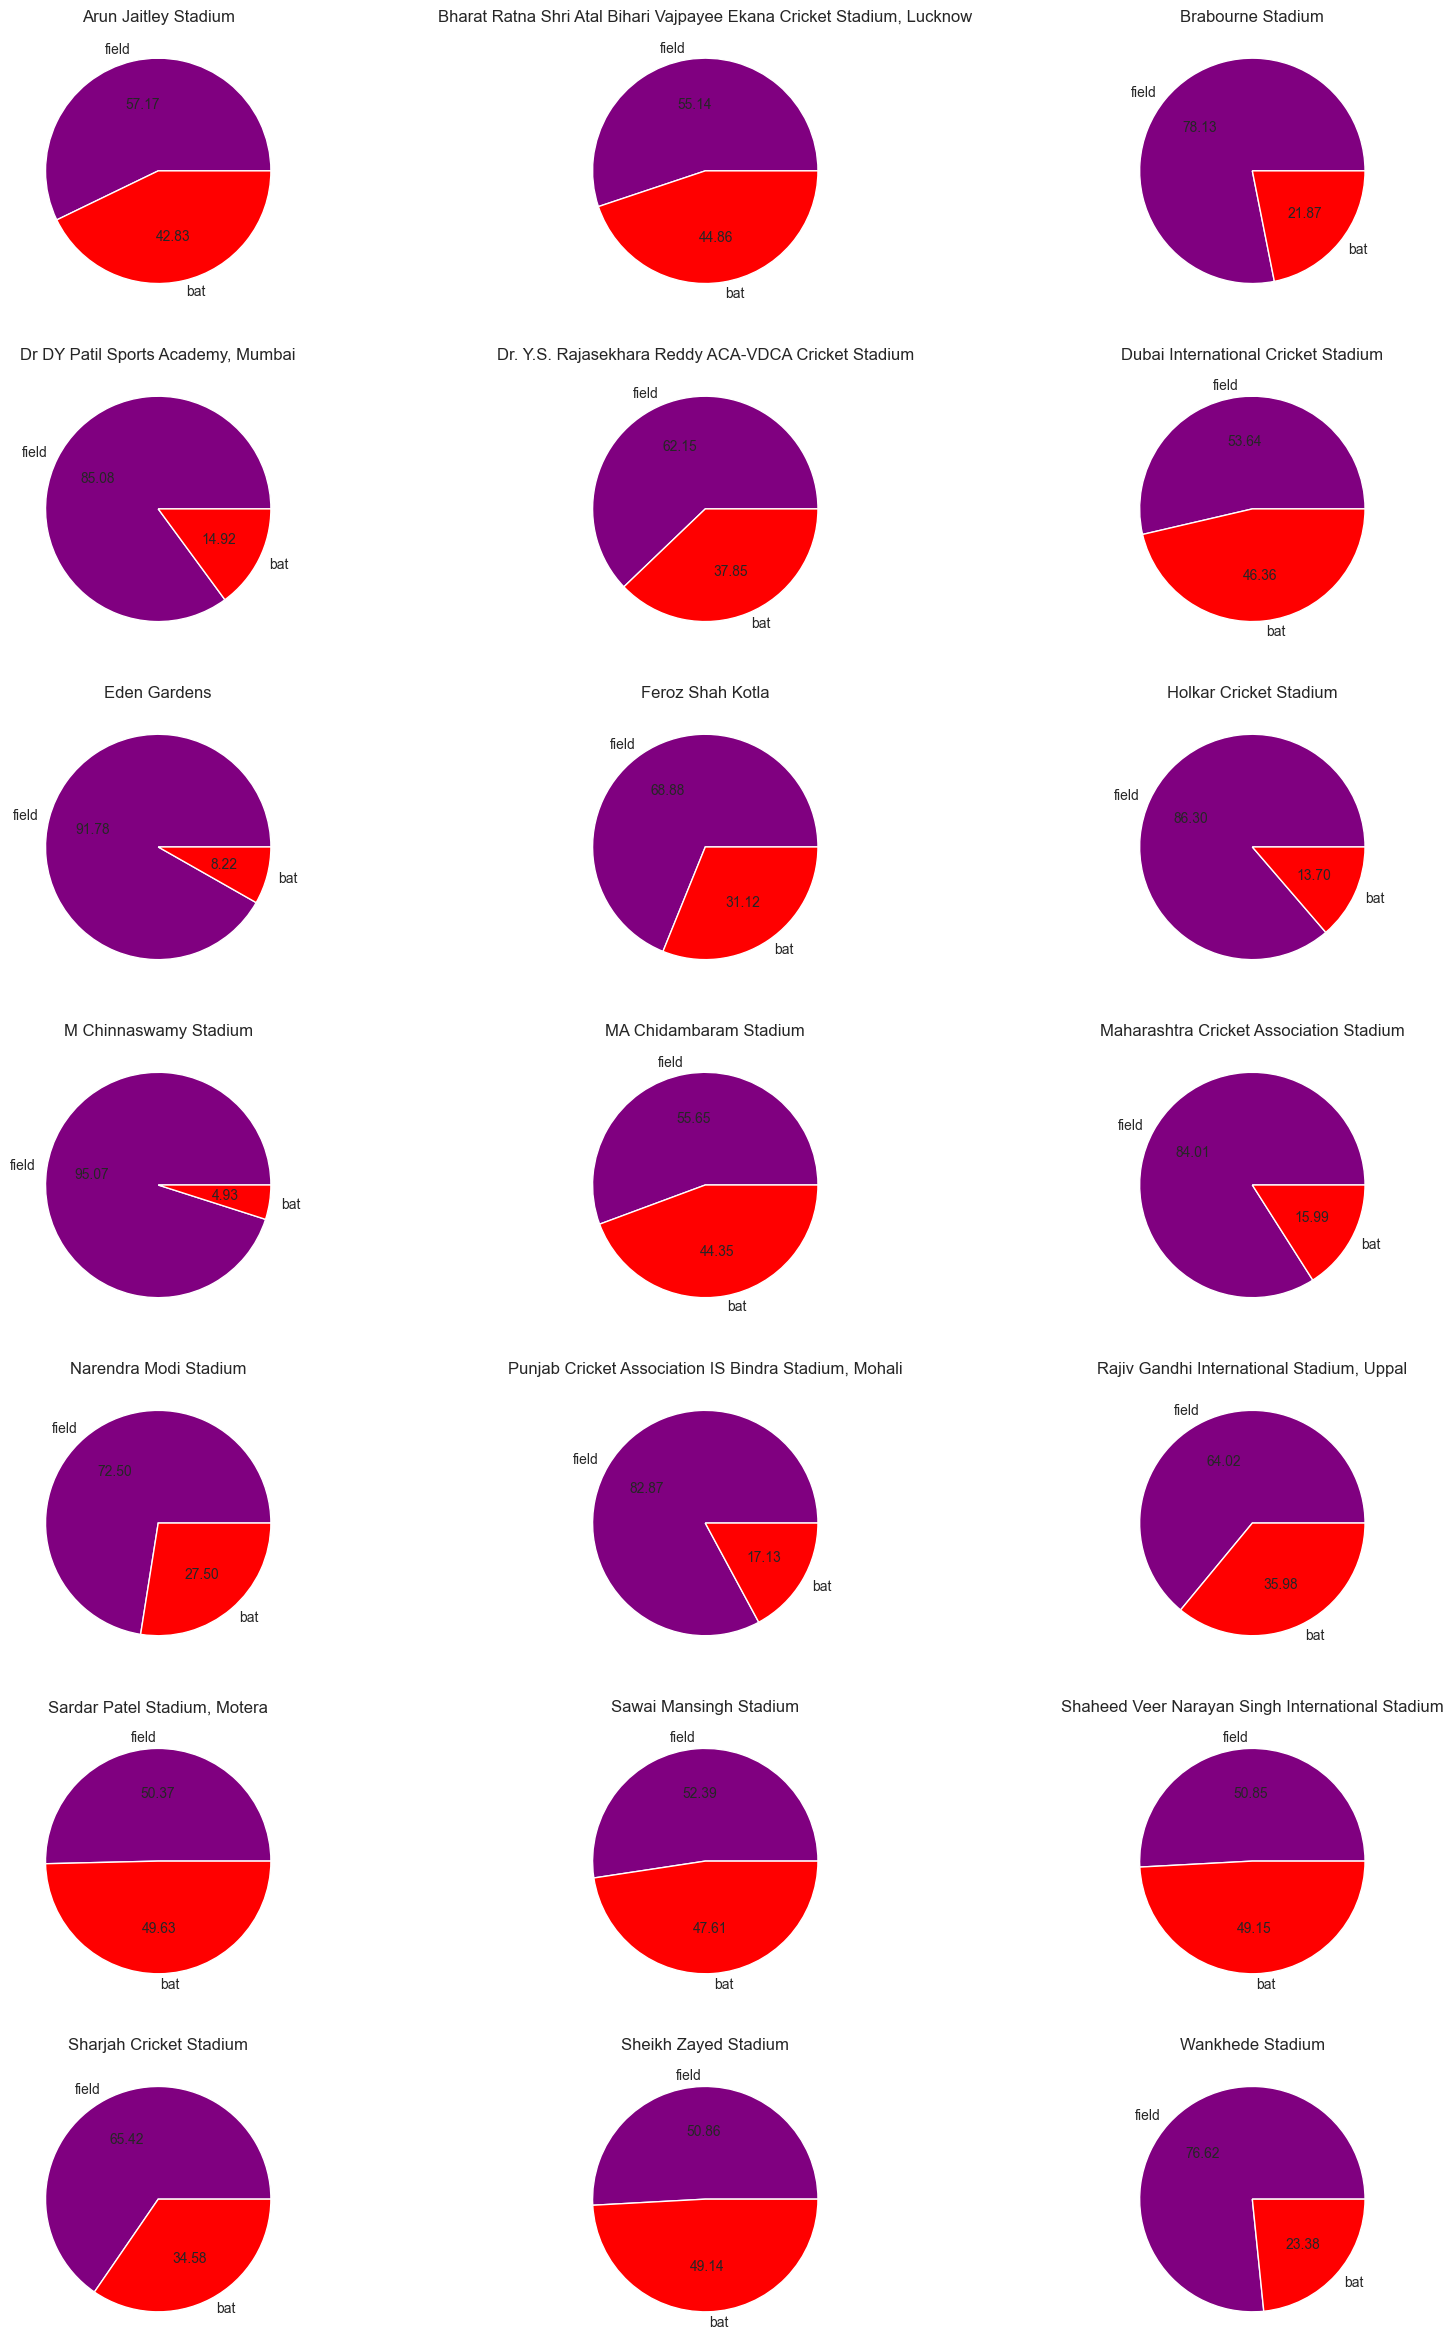

In [27]:
arr=['Arun Jaitley Stadium','Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow','Brabourne Stadium','Dr DY Patil Sports Academy, Mumbai','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium','Dubai International Cricket Stadium','Eden Gardens','Feroz Shah Kotla','Holkar Cricket Stadium','M Chinnaswamy Stadium','MA Chidambaram Stadium','Maharashtra Cricket Association Stadium','Narendra Modi Stadium','Punjab Cricket Association IS Bindra Stadium, Mohali','Rajiv Gandhi International Stadium, Uppal','Sardar Patel Stadium, Motera','Sawai Mansingh Stadium','Shaheed Veer Narayan Singh International Stadium','Sharjah Cricket Stadium','Sheikh Zayed Stadium','Wankhede Stadium']
plt.subplots(7,3,figsize=(20,30))
for i in range(len(arr)):
    plt.subplot(7,3,i+1)
    plt.pie(std[arr[i]].values,labels=["field","bat"],autopct="%.2f",colors=["purple","red"])
    plt.title(arr[i])
plt.show()

The above pieplot shows the toss decision taken by the various captians of the team captian among various stadiums.
Each pieplot represents the toss decision in each stadium.The pieplots of 'Eden Gardens','M Chinnaswamy Stadium','Maharashtra Cricket Association Stadium','Narendra Modi Stadium','Rajiv Gandhi International Stadium'shows that there is a clear biasedness towards bowling.This shows that the pitch in these stadiums provide advantages towards team batting second.And when we groupby the venue based on their uniqueness we saw that 'Barsapara Cricket Stadium, Guwahati','Green Park','Himachal Pradesh Cricket Association Stadium, Dharamsala' and 'JSCA International Stadium Complex' the team who won the toss never took batting first.Now coming on to the stadium sucha as 'Sardar patel Stadium,Motera','Sawai Mansingh Stadium' and Shaheed Veer Narayan Sign International Stadium have equal chances to choose bat as well as bowl,since the pieplot of these stadium shows a equal distribution.

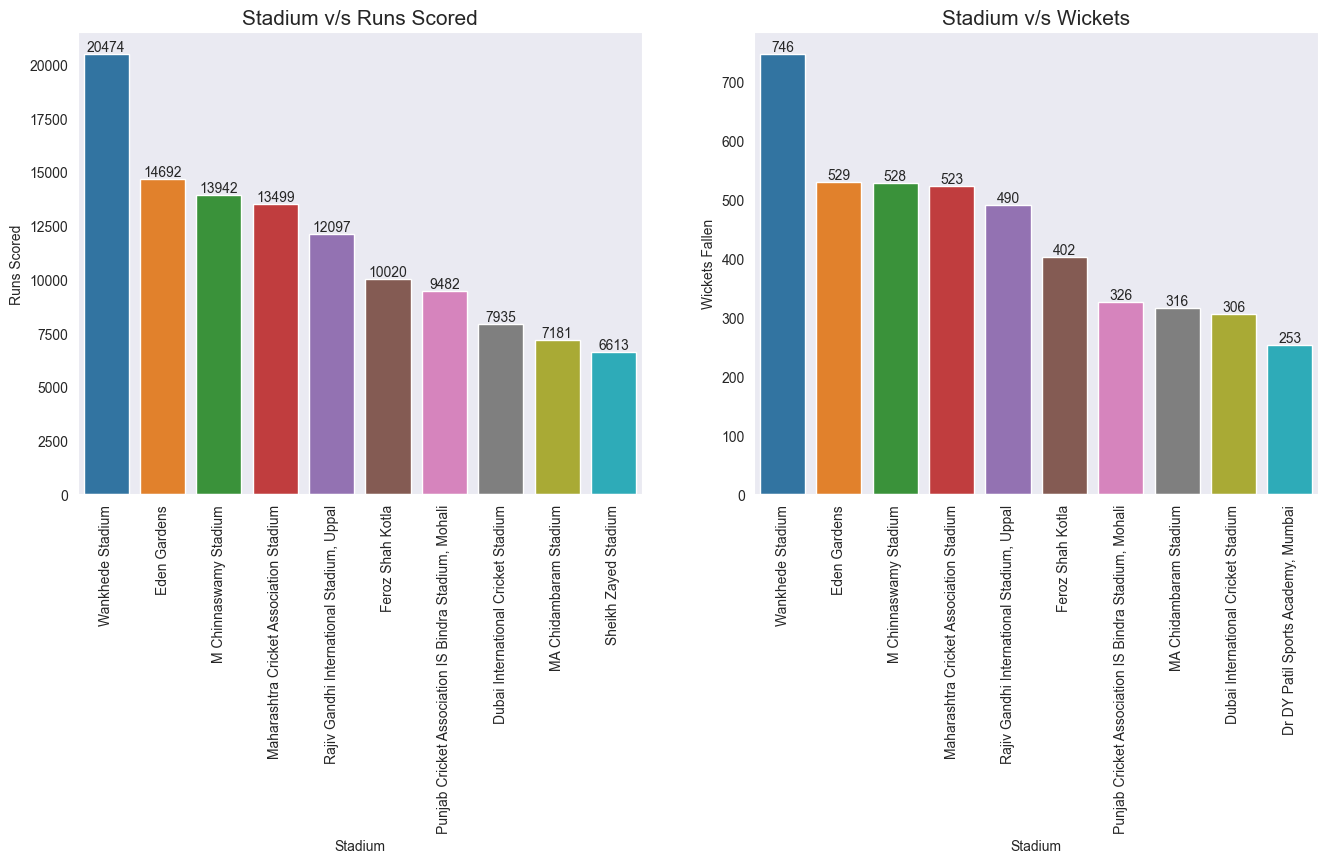

In [28]:
runs=df.groupby("venue")["batsman_runs"].sum().sort_values(ascending=False)
runs=runs.head(10)
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
fig=sns.barplot(x=runs.index,y=runs.values)
fig.bar_label(fig.containers[0])
plt.title("Stadium v/s Runs Scored",fontsize = 15)
plt.xlabel("Stadium")
plt.ylabel("Runs Scored")
plt.xticks(rotation="vertical")

plt.subplot(1,2,2)
out=df.groupby("venue")["is_wicket"].sum().sort_values(ascending=False)
out=out.head(10)
ax=sns.barplot(x=out.index,y=out.values)
ax.bar_label(ax.containers[0])
plt.title("Stadium v/s Wickets",fontsize = 15)
plt.xlabel("Stadium")
plt.ylabel("Wickets Fallen")
plt.xticks(rotation="vertical")
plt.show()

The above 2 barplot shows Runs scored in varoius stadiums and number of wickets taken in popular stadiums repectievly.In the first graph we had taken Stadiums in the x-axis and Runs scored inthe y-axis.As the from the graph it is clear the Wankhade stadiums have conceded most the number of runs(20474) and Eden Gardens(14692) is in the second place.This plot tells us that Wankhade stadiums have a batting supporting pitch.Sheikhn Zayed Stadium have least runs conceded(6613).
Wankhade Stadium also leads in the number of wickets fallen which is 746 which is far ahead od Eden gardens which is in the second place(529).M Chinnaswami Stadium(528) and Maharashtra Cricket Association Stadium(523) had similiar figues in the case of number of wickets taken.

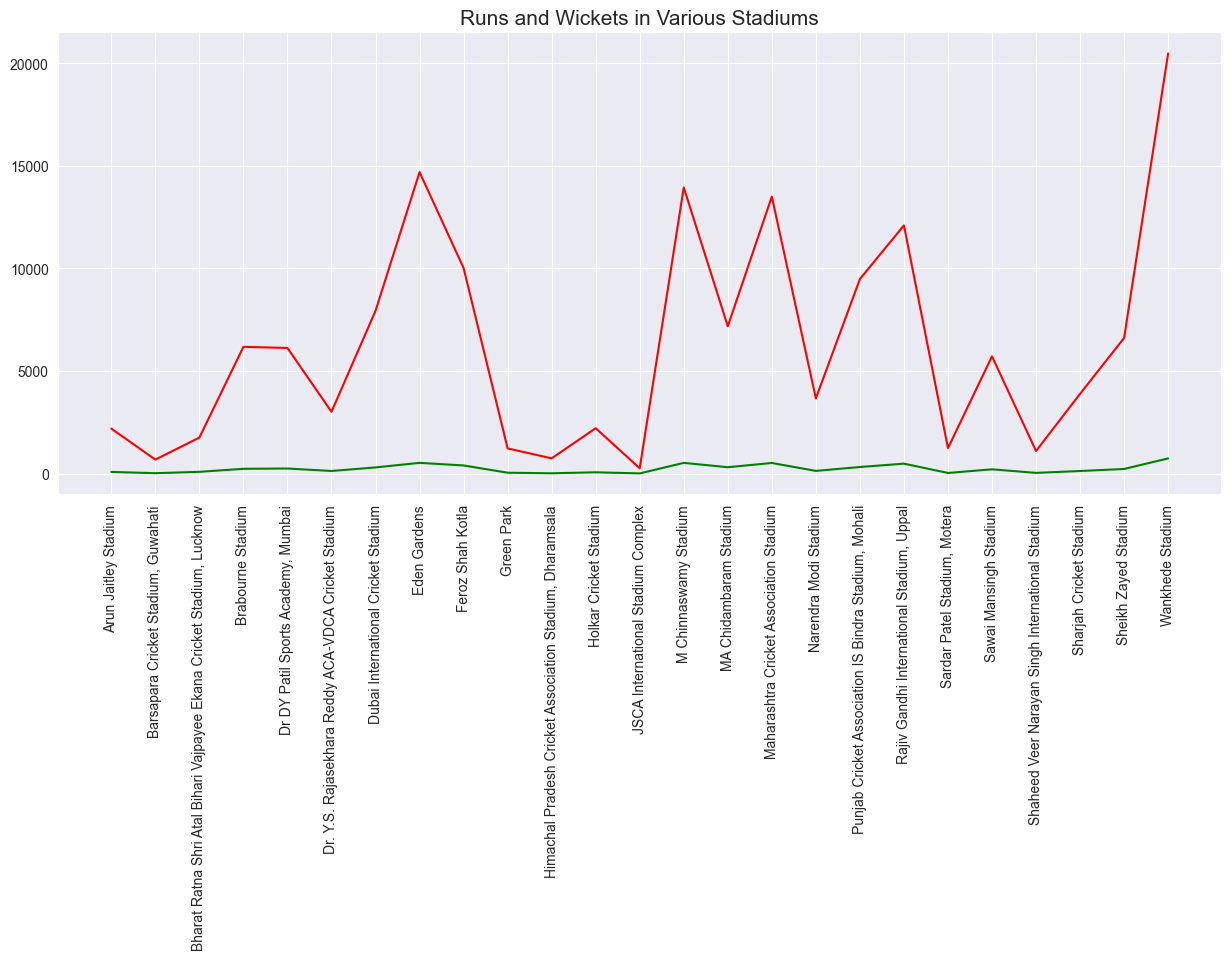

In [29]:
runs=df.groupby("venue")["batsman_runs"].sum()
out=df.groupby("venue")["is_wicket"].sum()
plt.figure(figsize=(15,6))
plt.plot(out.index,out.values,color='green',label='wickets')
plt.plot(runs.index,runs.values,color='red',label='runs')
plt.title("Runs and Wickets in Various Stadiums",fontsize =15)
plt.xticks(rotation="vertical")
plt.grid(True)
plt.show()

This above lineplot shows the total runs taken in each stadium and wickets fallen in each stadium.

In [30]:
a=df.groupby(["venue","Year","id","batting_team",])["batsman_runs"].sum()
avg_std=df.groupby(["venue","Year"])["batsman_runs"].sum()
mat=df.groupby(["venue","Year"])["id"].nunique()
avg_score=avg_std/(2*mat)
lst=['2015','2016','2017','2018','2019','2020','2021','2022','2023']

In [31]:
print(avg_score["Wankhede Stadium"])
print("......................")
print(avg_score["Eden Gardens"])
print("......................")
print(avg_score["M Chinnaswamy Stadium"])
print("......................")
print(avg_score["Maharashtra Cricket Association Stadium"])

Year
2015    166.187500
2016    144.250000
2017    159.500000
2018    158.000000
2019    163.785714
2022    152.261905
2023    184.071429
dtype: float64
......................
Year
2015    162.214286
2016    139.500000
2017    144.785714
2018    153.888889
2019    182.642857
2022    178.750000
2023    171.357143
dtype: float64
......................
Year
2015    132.571429
2016    171.222222
2017    121.312500
2018    174.785714
2019    149.571429
2023    180.142857
dtype: float64
......................
Year
2015    144.375000
2016    155.611111
2017    156.083333
2018    159.416667
2022    149.384615
dtype: float64


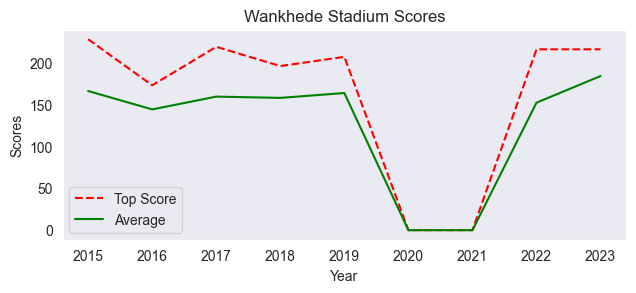

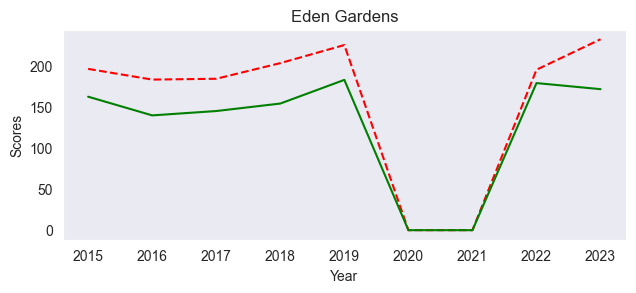

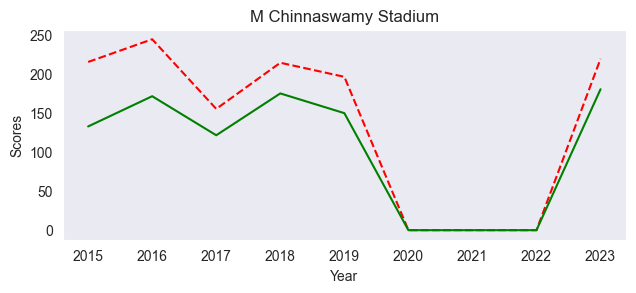

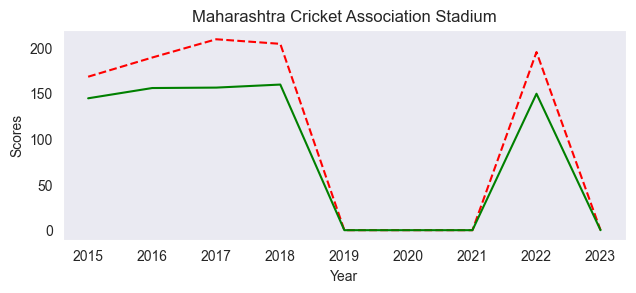

In [32]:
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
max_run=[]
for i in range(2015,2024):
    try:
        max_run.append(a["Wankhede Stadium"][i].max())
        max_run
    except KeyError:
        max_run.append(0)
        continue
mumbai=[166.187500,144.250000,159.500000,158.000000,163.785714,0,0,152.261905,184.071429]
plt.plot(lst,max_run,label='Top Score',color='Red',linestyle='--')
plt.plot(lst,mumbai,label='Average',color='Green')
plt.title("Wankhede Stadium Scores")
plt.xlabel("Year")
plt.ylabel("Scores")
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2,2,2)
max_run=[]
for i in range(2015,2024):
    try:
        max_run.append(a["Eden Gardens"][i].max())
        max_run
    except KeyError:
        max_run.append(0)
        continue
kolkata=[162.214286,139.500000,144.785714,153.888889,182.642857,0,0,178.750000,171.357143]
plt.plot(lst,max_run,label='Top Score',color='Red',linestyle='--')
plt.plot(lst,kolkata,label='Average',color='Green')
plt.title("Eden Gardens")
plt.xlabel("Year")
plt.ylabel("Scores")
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2,2,3)
max_run=[]
for i in range(2015,2024):
    try:
        max_run.append(a["M Chinnaswamy Stadium"][i].max())
        max_run
    except KeyError:
        max_run.append(0)
        continue
banglore=[132.571429,171.222222,121.312500,174.785714,149.571429,0,0,0,180.142857]
plt.plot(lst,max_run,label='Top Score',color='Red',linestyle='--')
plt.plot(lst,banglore,label='Average',color='Green')
plt.title("M Chinnaswamy Stadium")
plt.xlabel("Year")
plt.ylabel("Scores")
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2,2,4)
max_run=[]
for i in range(2015,2024):
    try:
        max_run.append(a["Maharashtra Cricket Association Stadium"][i].max())
        max_run
    except KeyError:
        max_run.append(0)
        continue
mh=[144.375000,155.611111,156.083333,159.416667,0,0,0,149.384615,0]
plt.plot(lst,max_run,label='Top Score',color='Red',linestyle='--')
plt.plot(lst,mh,label='Average',color='Green')
plt.title("Maharashtra Cricket Association Stadium")
plt.xlabel("Year")
plt.ylabel("Scores")
plt.show()

Now we consider most popular stadiums and do a line plot.
In the x-axis we plot year and in y-axis we plot scores.The dotted line represents the top-score of that year and line represents the average score of that ground.There is no matches played in Indian grounds in the year 2020 and 2021.As result we can see a sudden fall ith graph in the year 2020 and 2021.
From these plot it's clear that M Chinnaswami stadium is most run-scoring ground among others.They had the highest score in the year 2016

# TEAM PERFOMANCE

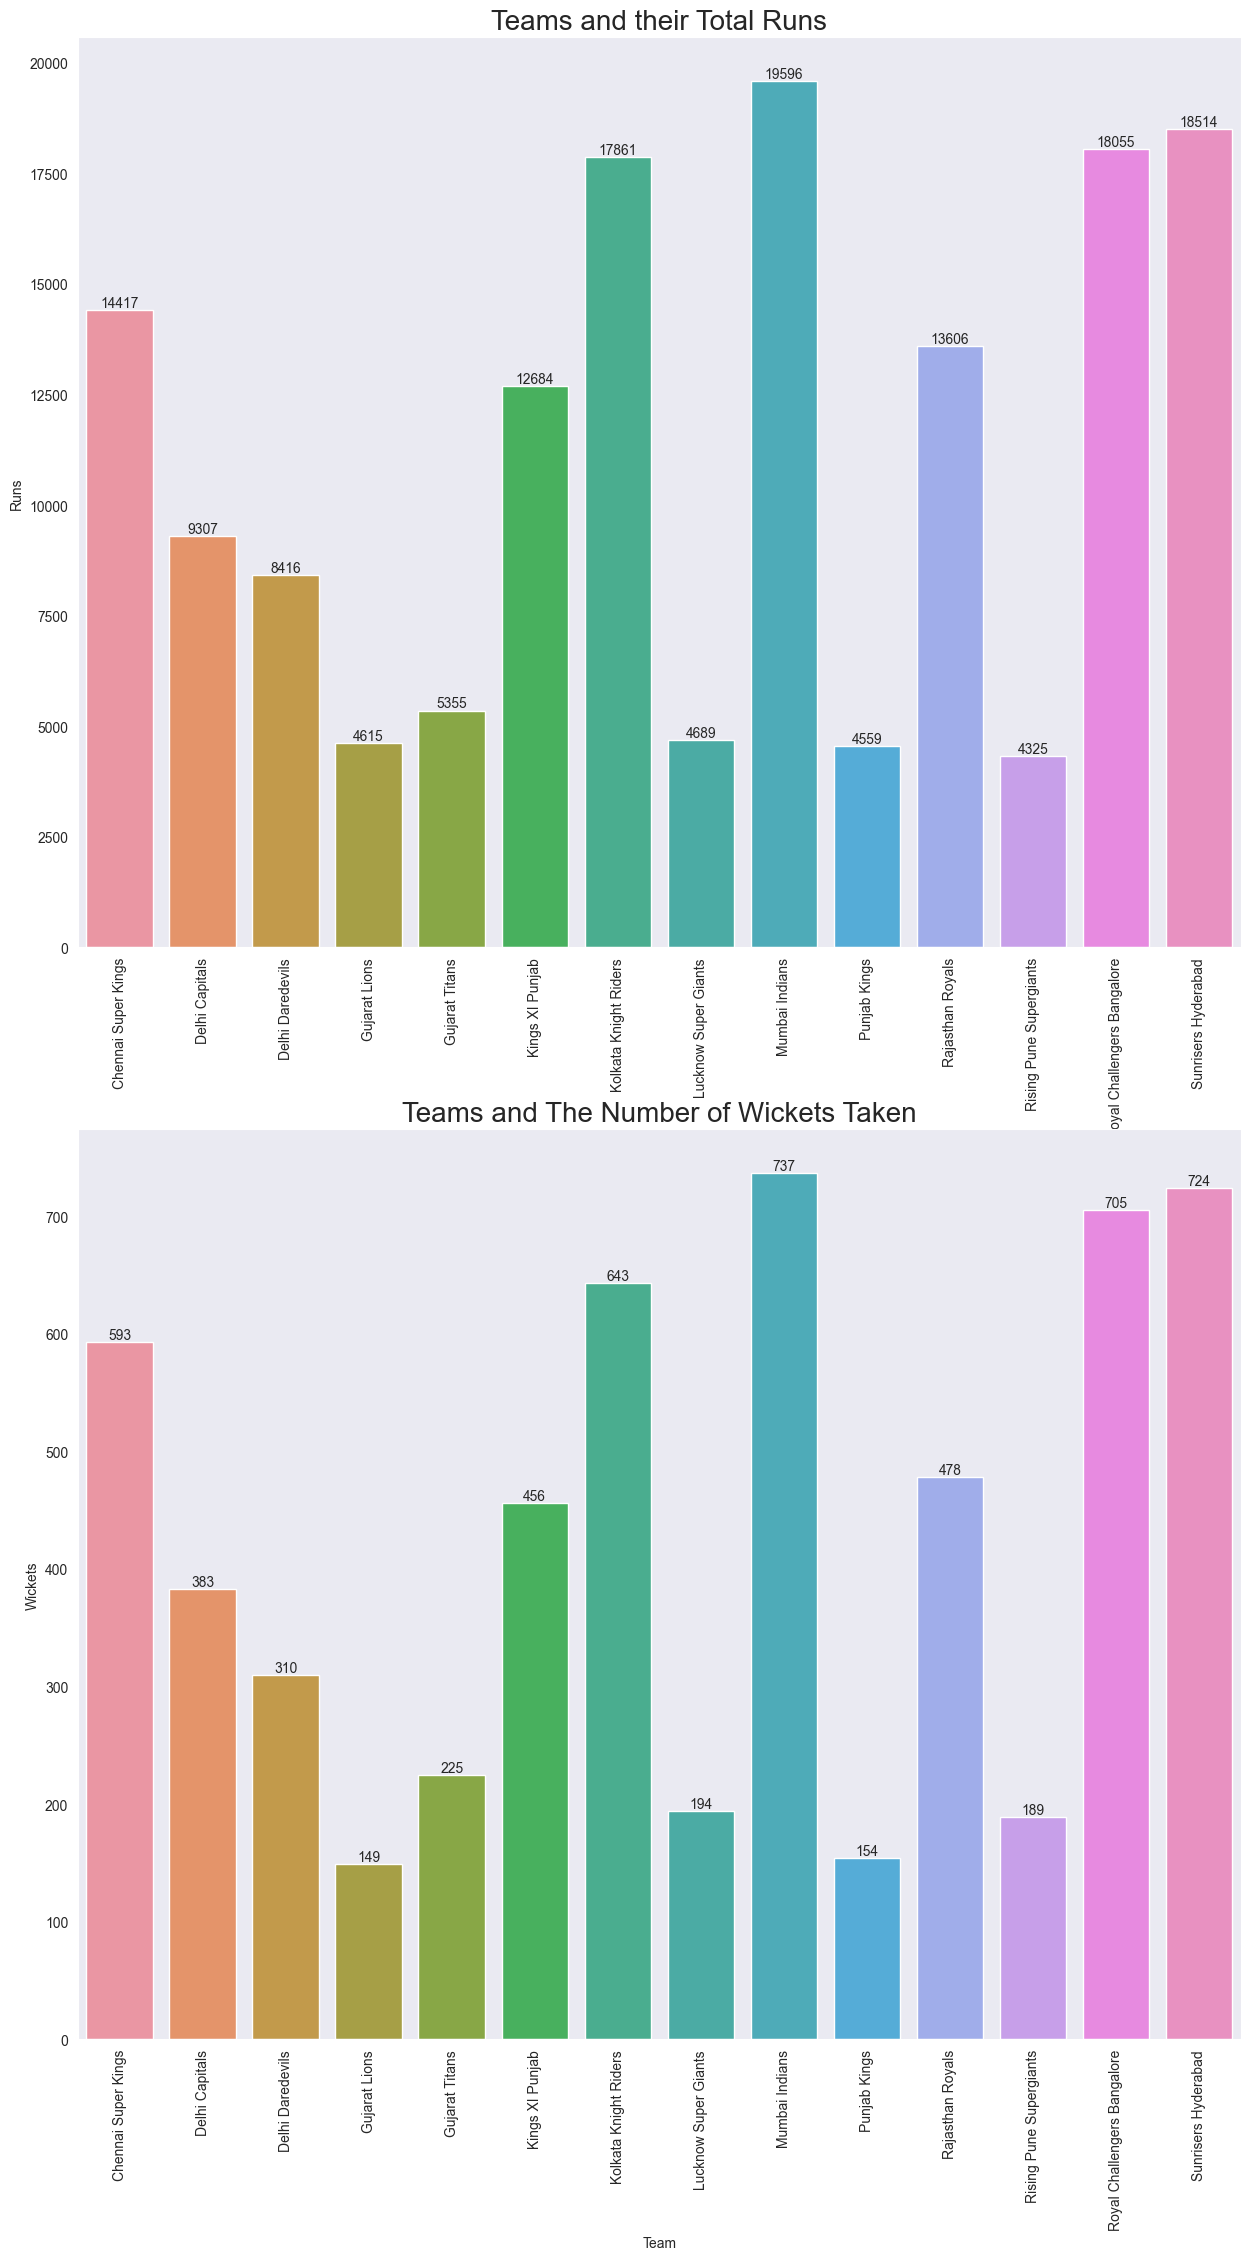

In [41]:
team=df.groupby("batting_team")["batsman_runs"].sum()
sns.set_style("dark")
plt.figure(figsize=(15,26))
plt.subplot(2,1,1)
team_runs=sns.barplot(x=team.index,y=team.values)
team_runs.bar_label(team_runs.containers[0])
plt.title("Teams and their Total Runs",fontsize=20)
plt.xlabel("Team")
plt.ylabel("Runs")
plt.xticks(rotation="vertical")

plt.subplot(2,1,2)
bteam=df.groupby("bowling_team")["is_wicket"].sum()
ax=sns.barplot(x=bteam.index,y=bteam.values)
ax.bar_label(ax.containers[0])
plt.title("Teams and The Number of Wickets Taken",fontsize=20)
plt.xlabel("Team")
plt.ylabel("Wickets")
plt.xticks(rotation="vertical")
plt.show()

The above 2 bar plot shows the performance of each team which had played ipl in terms of their runs scored and wickets taken.
Mumbai Indians have a clear cut dominance over the other teams in terms of runs(19596) as well as wickets taken(737).
Sunrises Hyderabad have the 2nd position and that too in both runs(18514) as well as wickets taken(724).Royal Challenges Banglore have the third position.They had taken 18055 runs and 705 wickets in the whole 15 seasons.

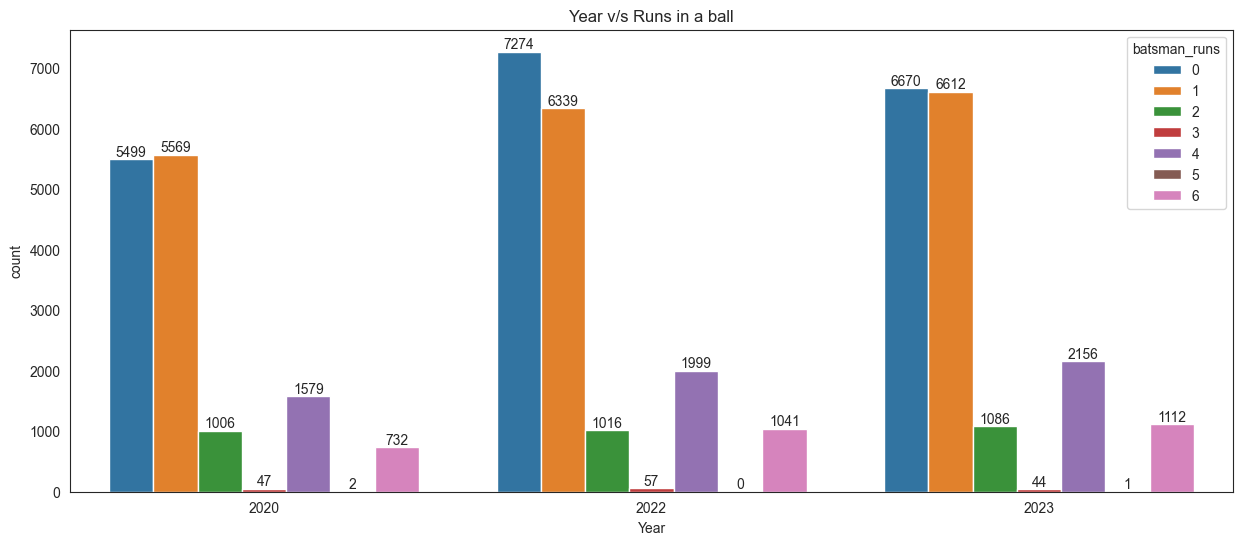

In [34]:
condition = df['Year'] > 2019
subset_df = df[condition]
sns.set_style("white")
plt.figure(figsize=(15,6))
byr=sns.countplot(data=subset_df,x='Year',hue='batsman_runs')
plt.title("Year v/s Runs in a ball")
for i in byr.containers:
    byr.bar_label(i)
plt.show()

The above countplot shows the runs scored in each ball among the years 2020,2021,2023.As you can see there the total number of balls is increasing each year and the number of boundaries and sixes are also increasing.In past few years the ipl had became more competative and number of sixes had increased. 

# PLAYER PERFOMANCE

In [ ]:
plt.figure(figsize=(16,6))
condition = df['Year'] > 2019
subset_df = df[condition]
batsman=subset_df.groupby("batsman")['batsman_runs'].sum().sort_values(ascending=False)
batsman=batsman.head(10)
sns.set_style("dark")
plt.subplot(1,2,1)
pic=sns.barplot(x=batsman.index,y=batsman.values)
pic.bar_label(pic.containers[0])
plt.title("Best Batsman")
plt.xlabel("Batsman Name")
plt.xticks(rotation=90)
plt.ylabel("Total Score")
plt.subplot(1,2,2)
bowler=subset_df.groupby("bowler")['is_wicket'].sum().sort_values(ascending=False)
bowler=bowler.head(10)
pic=sns.barplot(x=bowler.index,y=bowler.values)
pic.bar_label(pic.containers[0])
plt.title("Best Bowler")
plt.xlabel("Bowler Name")
plt.xticks(rotation=90)
plt.ylabel("Total wickets")
plt.suptitle("Recent 3 Year Performnance")
plt.show()

The above barplots shows the perfomance top 10 batsman and bowlers after the year 2019.
Considering batsman Shubhman Gill is leading the table with 1808 runs followed by F du plessis with 1644 runs.Jos buttler is the third with 1579 runs.
In bolwers YS Chahal had taken most wickets since 2019 with 71 wickets and Rashid Khan had taken 69 wickets and is in the second position.Mohammed Shammi is third with 68 wickets

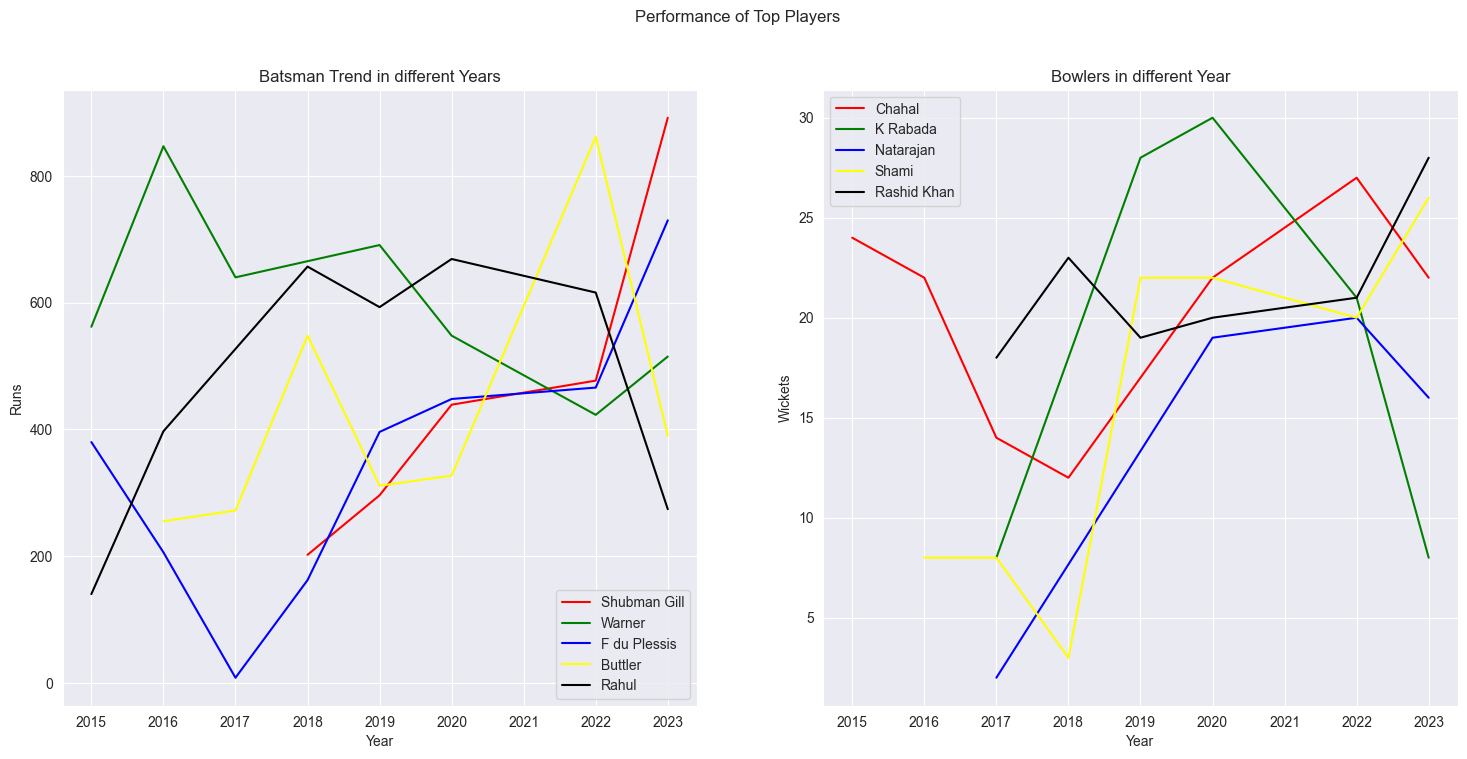

In [58]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
player=df.groupby(["batsman","Year"])['batsman_runs'].sum()
plt.plot(player["Shubman Gill"].index,player["Shubman Gill"].values,color="red",label="Shubman Gill")
plt.plot(player["David Warner"].index,player["David Warner"].values,color="green",label="Warner")
plt.plot(player["F du Plessis"].index,player["F du Plessis"].values,color="blue",label="F du Plessis")
plt.plot(player["Jos Buttler"].index,player["Jos Buttler"].values,color="yellow",label="Buttler")
plt.plot(player["KL Rahul"].index,player["KL Rahul"].values,color="black",label="Rahul")
plt.xlabel("Year")
plt.ylabel("Runs")
plt.title("Batsman Trend in different Years")
plt.grid(True) 
plt.legend()

plt.subplot(1,2,2)
bowler=df.groupby(["bowler","Year"])['is_wicket'].sum()
plt.plot(bowler["YS Chahal"].index,bowler["YS Chahal"].values,color="red",label="Chahal")
plt.plot(bowler["K Rabada"].index,bowler["K Rabada"].values,color="green",label="K Rabada")
plt.plot(bowler["T Natarajan"].index,bowler["T Natarajan"].values,color="blue",label="Natarajan")
plt.plot(bowler["Mohammed Shami"].index,bowler["Mohammed Shami"].values,color="yellow",label="Shami")
plt.plot(bowler["Rashid Khan"].index,bowler["Rashid Khan"].values,color="black",label="Rashid Khan")
plt.xlabel("Year")
plt.ylabel("Wickets")
plt.title("Bowlers in different Year")
plt.grid(True) 
plt.legend()
plt.suptitle('Performance of Top Players')
plt.show()


The above line plots shows the trend of performance of Top 5 Players in terms of batting as well as bowling.In the first plot of batters Shubman Gill and F du Plessis keeps a trend of improving batting as they both find it successfull in scoring runs consistendly over the years.Infact they had a high increase in runs among the years 2022 and 2023.Where as Warner who had a struggling phase in the years 2019-2022, he had made a reasonable comeback in the year 2023.
KL Rahul and buttler who had wonderfull seasons from 2019-2022 both struggled very much in the year 2023.
Coming onto the case of bowlers Rashid Khan and Muhamed Shami keeps on increasing thier performance in each year by taking more wickets in each year.Natrajan who had wonderfull season in the upto the year 2022 had drastic fall in the year 2023.Rabada also had a worst year sice 2020. 

### Modelling players performace to 2024

In [65]:
#All are self desined functions
def lagrange_interpolation( x_values, y_values,x=2021):
    n = len(x_values)
    result = 0.0

    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    if result<5:
        result=y_values[-1]

    return result
def player(name="David Warner",t='batsman',gain='batsman_runs'):
    p=dict(df.groupby([t,"Year"])[gain].sum()[name])
    p[2021]=int(lagrange_interpolation(list(p.keys()),list(p.values())))
    p=dict(sorted(p.items()))
    return [p.keys(),p.values()]


def approximate_value(p, t, gain, target_year):
    years = list(player(p,t,gain)[0])
    values = list(player(p,t,gain)[1])
    total=0
    d=1
    for i in range(len(years)):
        
        total+=(years[i])*values[i]
        d+=(years[i])
    approx_value = total/d

    return int(approx_value)

def performance_plot(li, x_labl, y_labl, t='batsman', gain='batsman_runs', ty=2024):
    colors=['red','green','blue','brown','black']
    years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,ty]
    plt.figure(figsize=(10, 6))

    for i in range(len(li)):
        player_name=li[i]
        x, y = player(player_name, t, gain)
        plt.plot(x, y, label=player_name+' (New: {})'.format(approximate_value(player_name, t, gain, ty)),color=colors[i])
        plt.plot([list(x)[-1],ty],[list(y)[-1], approximate_value(player_name, t, gain, ty)], color=colors[i], linestyle='--')

    plt.xticks(years)
    plt.grid(True)
    plt.xlabel(x_labl)
    plt.ylabel(y_labl)
    plt.legend()
    plt.title('Advanced Performance Plot')
    plt.show()

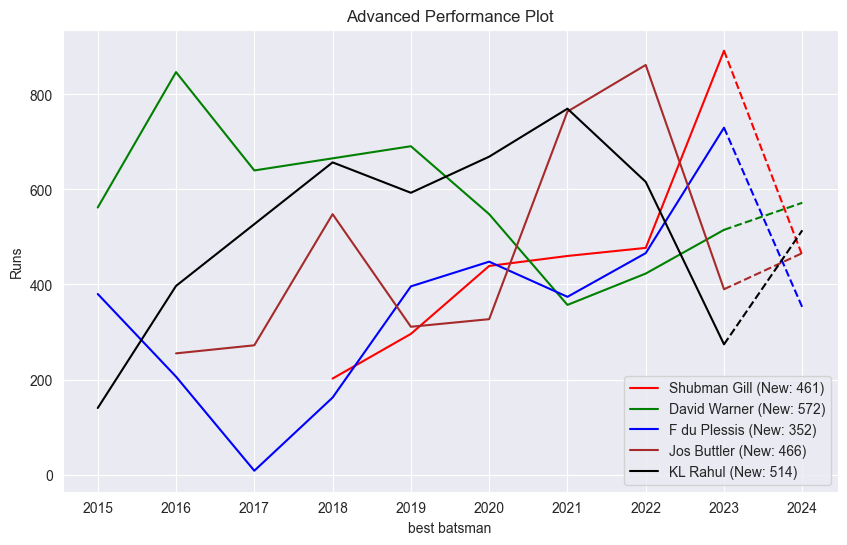

In [67]:
performance_plot(["Shubman Gill","David Warner","F du Plessis","Jos Buttler","KL Rahul"],x_labl='best batsman',y_labl='Runs')

Using Lagrange Interpolation first we interpolate the run scored by the top batsman in the year 2021.And using self declared function (using wieghted average) we had predicted the runs scored by them in the year 2024.As of our prediction KL Rahul will be doing a comeback in the year 2024 whereas Shubman Gill will be having a tough season in the year 2024.
Using this mathematical prediction we can say that Jos Buttler and KL Rahul will boing better next year

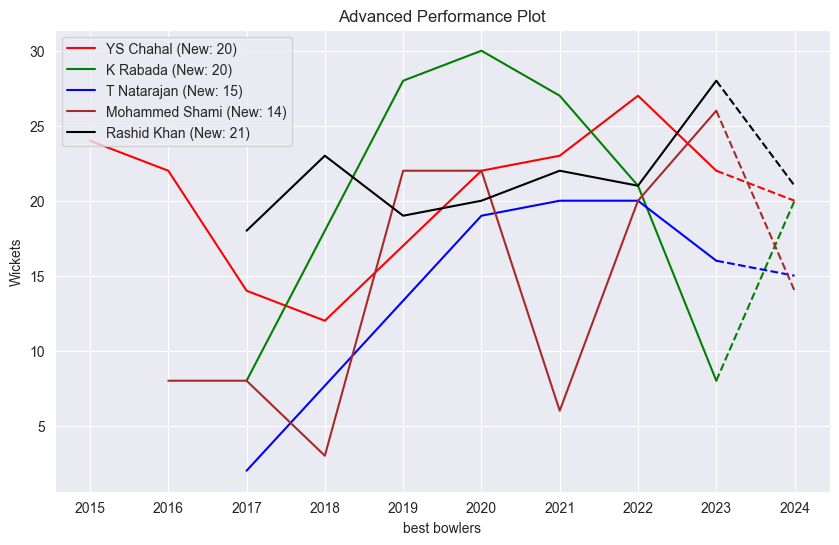

In [71]:
performance_plot(["YS Chahal","K Rabada","T Natarajan","Mohammed Shami","Rashid Khan"],x_labl='best bowlers',y_labl='Wickets',t='bowler',gain='is_wicket',ty=2024)

Using Lagrange Interpolation first we interpolate the run scored by the top bowler in the year 2021.And using self declared function (using wieghted average) we had predicted the wickets taken by them in the year 2024.As of our prediction Rabada will be doing a comeback in the year 2024 whereas Shami and Rashid khan will be having a tough season in the year 2024.
Using this mathematical prediction we can say that Rabada will boing better next year